In [1]:
#invite people for the Kaggle party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
#warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#bring in the six packs
train = pd.read_csv('./train.csv')

In [3]:
#check the decoration
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
#descriptive statistics summary
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

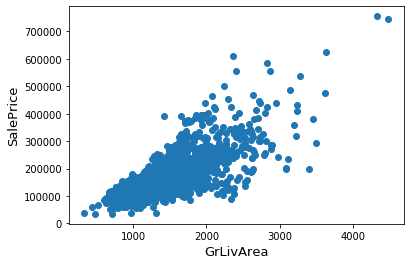

In [5]:
#Deleting outliers
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

In [6]:
#Now let's import and put the train and test datasets in  pandas dataframe

test = pd.read_csv('./test.csv')

In [7]:
#check the numbers of samples and features
print("The train data size before dropping Id feature is : {} ".format(train.shape))
print("The test data size before dropping Id feature is : {} ".format(test.shape))

#Save the 'Id' column
train_ID = train['Id']
test_ID = test['Id']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

#check again the data size after dropping the 'Id' variable
print("\nThe train data size after dropping Id feature is : {} ".format(train.shape)) 
print("The test data size after dropping Id feature is : {} ".format(test.shape))

The train data size before dropping Id feature is : (1458, 81) 
The test data size before dropping Id feature is : (1459, 80) 

The train data size after dropping Id feature is : (1458, 80) 
The test data size after dropping Id feature is : (1459, 79) 


In [8]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop=True)
#all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2917, 80)


Text(0.5, 1.0, 'Percent missing data by feature')

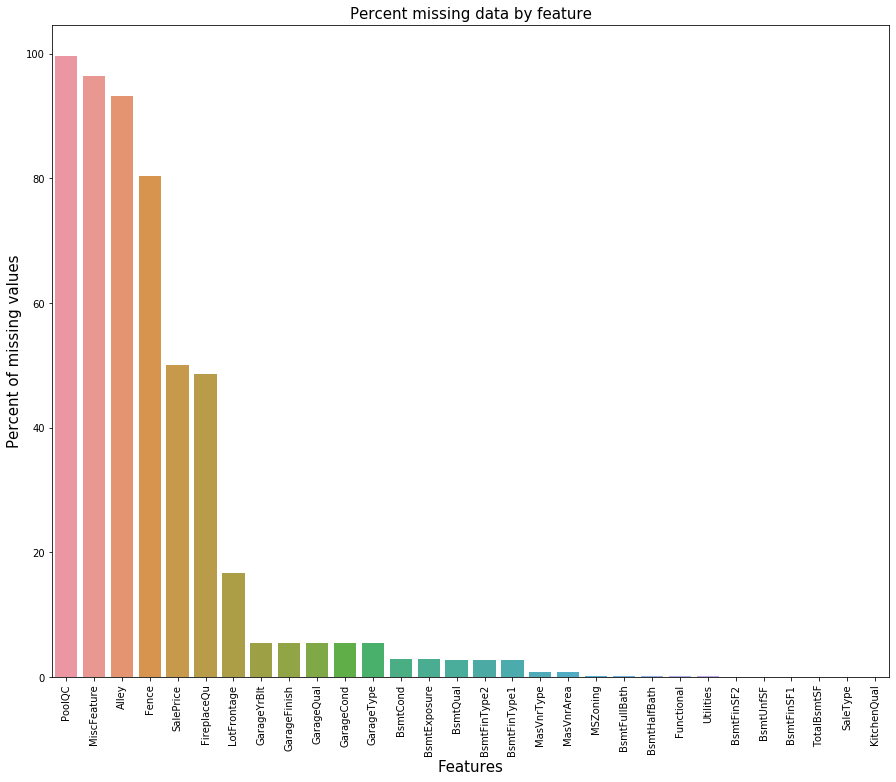

In [9]:
#missing data
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.shape
missing_data.head(30)

f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

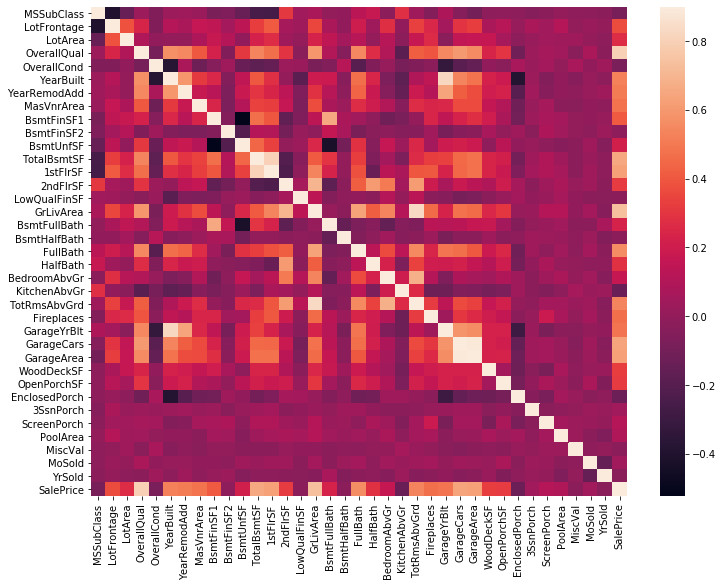

In [10]:
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.9, square=False);

In [11]:
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")
all_data["Alley"] = all_data["Alley"].fillna("None")
all_data["Fence"] = all_data["Fence"].fillna("None")
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])
all_data = all_data.drop(['Utilities'], axis=1)
all_data["Functional"] = all_data["Functional"].fillna("Typ")
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")
#Check remaining missing values if any 
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})

In [12]:
missing_data.head()

,Missing Ratio
SalePrice,50.017141


**數值轉類別

In [13]:
NumStr = ["MSSubClass","BsmtFullBath","BsmtHalfBath","HalfBath","BedroomAbvGr","KitchenAbvGr","MoSold","YrSold","YearBuilt","YearRemodAdd","LowQualFinSF","GarageYrBlt"]
for col in NumStr:
    all_data[col]=all_data[col].astype(str)
##Changing OverallCond into a categorical variable
#all_data['OverallCond'] = all_data['OverallCond'].astype(str)

##Year and month sold are transformed into categorical features.
#all_data['YrSold'] = all_data['YrSold'].astype(str)
#all_data['MoSold'] = all_data['MoSold'].astype(str)

**類別轉數值

In [14]:
from sklearn.preprocessing import LabelEncoder
#cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope', 'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 'YrSold', 'MoSold')
## process columns, apply LabelEncoder to categorical features
#for c in cols:
#    lbl = LabelEncoder() 
#    lbl.fit(list(all_data[c].values)) 
#    all_data[c] = lbl.transform(list(all_data[c].values))

# shape        
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2917, 79)


**新增參數

In [15]:
# Adding total sqfootage feature 
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

In [16]:
all_data.shape

(2917, 80)

In [17]:
all_data.groupby(['MSSubClass'])[['SalePrice']].agg(['mean','median','count'])

SalePrice                
                     mean    median count
MSSubClass                               
120         200779.080460  192000.0    87
150                   NaN       NaN     0
160         138647.380952  146000.0    63
180         102300.000000   88500.0    10
190         129613.333333  128250.0    30
20          185224.811567  159250.0   536
30           95829.724638   99900.0    69
40          156125.000000  142500.0     4
45          108591.666667  107500.0    12
50          143302.972222  132000.0   144
60          240403.542088  216000.0   297
70          166772.416667  156000.0    60
75          192437.500000  163500.0    16
80          169736.551724  166500.0    58
85          147810.000000  140750.0    20
90          133541.076923  135980.0    52

In [18]:
#from ALL YOU NEED IS PCA
full=all_data.copy()
def map_values():
    full["oMSSubClass"] = full.MSSubClass.map({'180':1, '150' :1, 
                                        '30':2, '45':2, 
                                        '190':3, '50':3, '90':3, 
                                        '85':4, '40':4, '160':4, 
                                        '70':5, '20':5, '75':5, '80':5,
                                        '120': 6, '60':6})
    
    full["oMSZoning"] = full.MSZoning.map({'C (all)':1, 'RH':2, 'RM':2, 'RL':3, 'FV':4})
    
    full["oNeighborhood"] = full.Neighborhood.map({'MeadowV':1,
                                               'IDOTRR':2, 'BrDale':2,
                                               'OldTown':3, 'Edwards':3, 'BrkSide':3,
                                               'Sawyer':4, 'Blueste':4, 'SWISU':4, 'NAmes':4,
                                               'NPkVill':5, 'Mitchel':5,
                                               'SawyerW':6, 'Gilbert':6, 'NWAmes':6,
                                               'Blmngtn':7, 'CollgCr':7, 'ClearCr':7, 'Crawfor':7,
                                               'Veenker':8, 'Somerst':8, 'Timber':8,
                                               'StoneBr':9,
                                               'NoRidge':10, 'NridgHt':10})
    
    full["oCondition1"] = full.Condition1.map({'Artery':1,
                                           'Feedr':2, 'RRAe':2,
                                           'Norm':3, 'RRAn':3,
                                           'PosN':4, 'RRNe':4,
                                           'PosA':5 ,'RRNn':5})
    
    full["oBldgType"] = full.BldgType.map({'2fmCon':1, 'Duplex':1, 'Twnhs':1, '1Fam':2, 'TwnhsE':2})
    
    full["oHouseStyle"] = full.HouseStyle.map({'1.5Unf':1, 
                                           '1.5Fin':2, '2.5Unf':2, 'SFoyer':2, 
                                           '1Story':3, 'SLvl':3,
                                           '2Story':4, '2.5Fin':4})
    
    full["oExterior1st"] = full.Exterior1st.map({'BrkComm':1,
                                             'AsphShn':2, 'CBlock':2, 'AsbShng':2,
                                             'WdShing':3, 'Wd Sdng':3, 'MetalSd':3, 'Stucco':3, 'HdBoard':3,
                                             'BrkFace':4, 'Plywood':4,
                                             'VinylSd':5,
                                             'CemntBd':6,
                                             'Stone':7, 'ImStucc':7})
    
    full["oMasVnrType"] = full.MasVnrType.map({'BrkCmn':1, 'None':1, 'BrkFace':2, 'Stone':3})
    
    full["oExterQual"] = full.ExterQual.map({'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
    
    full["oFoundation"] = full.Foundation.map({'Slab':1, 
                                           'BrkTil':2, 'CBlock':2, 'Stone':2,
                                           'Wood':3, 'PConc':4})
    
    full["oBsmtQual"] = full.BsmtQual.map({'Fa':2, 'None':1, 'TA':3, 'Gd':4, 'Ex':5})
    
    full["oBsmtExposure"] = full.BsmtExposure.map({'None':1, 'No':2, 'Av':3, 'Mn':3, 'Gd':4})
    
    full["oHeating"] = full.Heating.map({'Floor':1, 'Grav':1, 'Wall':2, 'OthW':3, 'GasW':4, 'GasA':5})
    
    full["oHeatingQC"] = full.HeatingQC.map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
    
    full["oKitchenQual"] = full.KitchenQual.map({'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
    
    full["oFunctional"] = full.Functional.map({'Maj2':1, 'Maj1':2, 'Min1':2, 'Min2':2, 'Mod':2, 'Sev':2, 'Typ':3})
    
    full["oFireplaceQu"] = full.FireplaceQu.map({'None':1, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
    
    full["oGarageType"] = full.GarageType.map({'CarPort':1, 'None':1,
                                           'Detchd':2,
                                           '2Types':3, 'Basment':3,
                                           'Attchd':4, 'BuiltIn':5})
    
    full["oGarageFinish"] = full.GarageFinish.map({'None':1, 'Unf':2, 'RFn':3, 'Fin':4})
    
    full["oPavedDrive"] = full.PavedDrive.map({'N':1, 'P':2, 'Y':3})
    
    full["oSaleType"] = full.SaleType.map({'COD':1, 'ConLD':1, 'ConLI':1, 'ConLw':1, 'Oth':1, 'WD':1,
                                       'CWD':2, 'Con':3, 'New':3})
    
    full["oSaleCondition"] = full.SaleCondition.map({'AdjLand':1, 'Abnorml':2, 'Alloca':2, 'Family':2, 'Normal':3, 'Partial':4})            
                
                        
                        
    
    return "Done!"


In [19]:
full=all_data.copy()

In [20]:
map_values()

'Done!'

In [21]:
# drop two unwanted columns
#full.drop("LotAreaCut",axis=1,inplace=True)
full.drop(['SalePrice'],axis=1,inplace=True)

In [22]:
full.oMSSubClass

0       6
1       5
2       6
3       5
4       6
       ..
2912    4
2913    4
2914    5
2915    4
2916    6
Name: oMSSubClass, Length: 2917, dtype: int64

## PipeLine

In [23]:
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
class labelenc(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        lab=LabelEncoder()
        X["YearBuilt"] = lab.fit_transform(X["YearBuilt"])
        X["YearRemodAdd"] = lab.fit_transform(X["YearRemodAdd"])
        X["GarageYrBlt"] = lab.fit_transform(X["GarageYrBlt"])
        return X

In [24]:
from scipy.stats import skew
class skew_dummies(BaseEstimator, TransformerMixin):
    def __init__(self,skew=0.5):
        self.skew = skew
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        X_numeric=X.select_dtypes(exclude=["object"])
        skewness = X_numeric.apply(lambda x: skew(x))
        skewness_features = skewness[abs(skewness) >= self.skew].index
        X[skewness_features] = np.log1p(X[skewness_features])
        X = pd.get_dummies(X)
        return X

In [25]:
# build pipeline
from sklearn.pipeline import Pipeline, make_pipeline
pipe = Pipeline([
    ('labenc', labelenc()),
    ('skew_dummies', skew_dummies(skew=1)),
    ])

In [26]:
# save the original data for later use
full2 = full.copy()

In [27]:
print(full.shape)
print(full2.shape)

(2917, 101)
(2917, 101)


In [28]:
data_pipe = pipe.fit_transform(full2)

In [29]:
data_pipe.shape

(2917, 404)

In [30]:
#let pandas shaow all columns
#pd.set_option('display.max_columns', None)
data_pipe.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.189655,9.042040,7,5,110,53,5.283204,706.0,0.0,150.0,...,0,0,0,1,0,0,0,0,1,0
1,4.394449,9.169623,6,8,83,26,0.000000,978.0,0.0,284.0,...,0,0,0,1,0,0,0,0,1,0
2,4.234107,9.328212,7,5,108,52,5.093750,486.0,0.0,434.0,...,0,0,0,1,0,0,0,0,1,0
3,4.110874,9.164401,7,5,25,20,0.000000,216.0,0.0,540.0,...,0,0,0,1,1,0,0,0,0,0
4,4.442651,9.565284,8,5,107,50,5.860786,655.0,0.0,490.0,...,0,0,0,1,0,0,0,0,1,0


+ __use robustscaler since maybe there are other outliers.__

In [31]:
from sklearn.preprocessing import RobustScaler, StandardScaler
scaler = RobustScaler()

In [32]:
n_train=train.shape[0]

X = data_pipe[:n_train]
test_X = data_pipe[n_train:]
y= train.SalePrice

X_scaled = scaler.fit(X).transform(X)
y_log = np.log(train.SalePrice)
test_X_scaled = scaler.transform(test_X)

In [33]:
X_scaled.shape

(1458, 404)

## Feature Selection by Lasso

adding features to pipeline

In [34]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [35]:
lasso=Lasso(alpha=0.001)
lasso.fit(X_scaled,y_log)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [36]:
FI_lasso = pd.DataFrame({"Feature Importance":lasso.coef_}, index=data_pipe.columns)

In [37]:
FI_lasso.sort_values("Feature Importance",ascending=False)

,Feature Importance
GrLivArea,0.104914
OverallQual,0.102491
2ndFlrSF,0.072415
YearBuilt,0.068589
1stFlrSF,0.058028
...,...
BsmtFinType1_Unf,-0.016575
SaleCondition_Abnorml,-0.018594
KitchenAbvGr_2,-0.027793
CentralAir_N,-0.033644


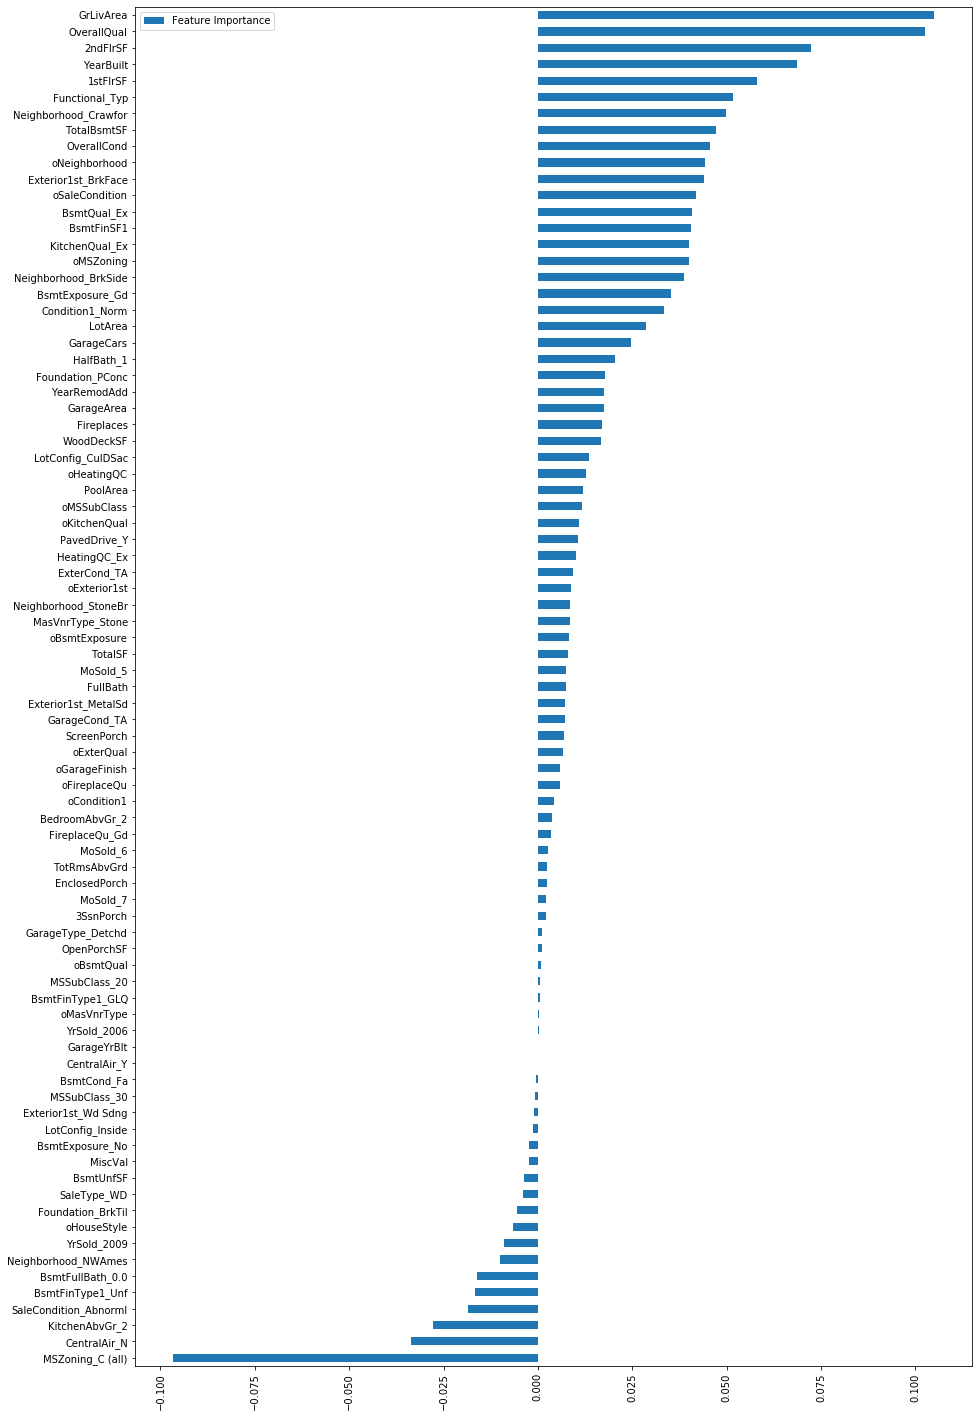

In [38]:
FI_lasso[FI_lasso["Feature Importance"]!=0].sort_values("Feature Importance").plot(kind="barh",figsize=(15,25))
plt.xticks(rotation=90)
plt.show()

In [39]:
class add_feature(BaseEstimator, TransformerMixin):
    def __init__(self,additional=1):
        self.additional = additional
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        if self.additional==1:
            X["TotalHouse"] = X["TotalBsmtSF"] + X["1stFlrSF"] + X["2ndFlrSF"]   
            X["TotalArea"] = X["TotalBsmtSF"] + X["1stFlrSF"] + X["2ndFlrSF"] + X["GarageArea"]
            
        else:
            X["TotalHouse"] = X["TotalBsmtSF"] + X["1stFlrSF"] + X["2ndFlrSF"]   
            X["TotalArea"] = X["TotalBsmtSF"] + X["1stFlrSF"] + X["2ndFlrSF"] + X["GarageArea"]
            
            X["+_TotalHouse_OverallQual"] = X["TotalHouse"] * X["OverallQual"]
            X["+_GrLivArea_OverallQual"] = X["GrLivArea"] * X["OverallQual"]
            X["+_oMSZoning_TotalHouse"] = X["oMSZoning"] * X["TotalHouse"]
            X["+_oMSZoning_OverallQual"] = X["oMSZoning"] + X["OverallQual"]
            X["+_oMSZoning_YearBuilt"] = X["oMSZoning"] + X["YearBuilt"]
            X["+_oNeighborhood_TotalHouse"] = X["oNeighborhood"] * X["TotalHouse"]
            X["+_oNeighborhood_OverallQual"] = X["oNeighborhood"] + X["OverallQual"]
            X["+_oNeighborhood_YearBuilt"] = X["oNeighborhood"] + X["YearBuilt"]
            X["+_BsmtFinSF1_OverallQual"] = X["BsmtFinSF1"] * X["OverallQual"]
            
            X["-_oFunctional_TotalHouse"] = X["oFunctional"] * X["TotalHouse"]
            X["-_oFunctional_OverallQual"] = X["oFunctional"] + X["OverallQual"]
            X["-_LotArea_OverallQual"] = X["LotArea"] * X["OverallQual"]
            X["-_TotalHouse_LotArea"] = X["TotalHouse"] + X["LotArea"]
            X["-_oCondition1_TotalHouse"] = X["oCondition1"] * X["TotalHouse"]
            X["-_oCondition1_OverallQual"] = X["oCondition1"] + X["OverallQual"]
            
           
            X["Bsmt"] = X["BsmtFinSF1"] + X["BsmtFinSF2"] + X["BsmtUnfSF"]
            X["Rooms"] = X["FullBath"]+X["TotRmsAbvGrd"]
            X["PorchArea"] = X["OpenPorchSF"]+X["EnclosedPorch"]+X["3SsnPorch"]+X["ScreenPorch"]
            X["TotalPlace"] = X["TotalBsmtSF"] + X["1stFlrSF"] + X["2ndFlrSF"] + X["GarageArea"] + X["OpenPorchSF"]+X["EnclosedPorch"]+X["3SsnPorch"]+X["ScreenPorch"]

    
            return X

In [40]:
pipe = Pipeline([
    ('labenc', labelenc()),
    ('add_feature', add_feature(additional=2)),
    ('skew_dummies', skew_dummies(skew=1)),
    ])

In [41]:
full_pipe = pipe.fit_transform(full)

In [42]:
full_pipe.shape

(2917, 425)

In [43]:
n_train=train.shape[0]
X = full_pipe[:n_train]
test_X = full_pipe[n_train:]
y= train.SalePrice

X_scaled = scaler.fit(X).transform(X)
y_log = np.log(train.SalePrice)
test_X_scaled = scaler.transform(test_X)

In [44]:
from sklearn.decomposition import PCA, KernelPCA
pca = PCA(n_components=410)

In [45]:
X_scaled=pca.fit_transform(X_scaled)
test_X_scaled = pca.transform(test_X_scaled)

In [46]:
X_scaled.shape, test_X_scaled.shape

((1458, 410), (1459, 410))

In [47]:
test_X_scaled

array([[ 3.44802001e+00,  3.14655319e+00,  4.28788853e+00, ...,
         5.70290343e-17,  5.66820896e-16,  2.55004351e-16],
       [ 3.68111313e-01,  2.30428125e+00,  1.35571903e-01, ...,
        -3.74917111e-16,  6.60495963e-16,  1.89952221e-16],
       [-1.20564889e+00, -5.39785344e-01,  1.39192466e-01, ...,
         7.26415456e-17,  2.04263689e-16, -1.90819582e-17],
       ...,
       [ 9.23483767e-02,  2.64916106e+00,  3.86956234e-02, ...,
        -3.64291930e-17,  2.67147415e-16,  1.31838984e-16],
       [ 3.37660700e+00, -6.08162547e-02,  2.81370614e-01, ...,
        -1.74556550e-16,  1.90385901e-16,  7.80625564e-18],
       [-3.28160651e+00, -6.32359215e-01, -5.32042027e-01, ...,
        -2.01444764e-16, -1.49619900e-16, -1.76941795e-16]])

# Try DNN..but performance is not very good.

In [48]:

# col_train = list(train.columns)
# col_train_bis = list(train.columns)
# COLUMNS = col_train
# FEATURES = col_train_bis
# LABEL = "SalePrice"
# feature_cols = FEATURES
# # Training set and Prediction set with the features to predict
# training_set = train[COLUMNS]
# prediction_set = train.SalePrice

In [49]:
# import keras
# import numpy as np
# import pandas as pd
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.wrappers.scikit_learn import KerasRegressor
# model = keras.models.Sequential()

# # model = Sequential()
# # model.add(Dense(200, input_dim=410, kernel_initializer='normal', activation='relu'))
# # model.add(Dense(100, kernel_initializer='normal', activation='relu'))
# # model.add(Dense(50, kernel_initializer='normal', activation='relu'))
# # model.add(Dense(25, kernel_initializer='normal', activation='relu'))
# # model.add(Dense(1, kernel_initializer='normal'))


# model = keras.models.Sequential([
# # keras.layers.Flatten(input_dim=410),
# # keras.layers.BatchNormalization(),
# keras.layers.Dense(200, input_dim=410,activation="relu", kernel_initializer="normal"),
# keras.layers.BatchNormalization(),
# keras.layers.Dense(100, activation="relu", kernel_initializer="normal"),
# keras.layers.BatchNormalization(),
# keras.layers.Dense(50, activation="relu", kernel_initializer="normal"),
# keras.layers.BatchNormalization(),
# keras.layers.Dense(25, activation="relu", kernel_initializer="normal"),
# keras.layers.BatchNormalization(),
# keras.layers.Dense(1, kernel_initializer='normal')
# ])


# # Compile model
# model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adadelta())

In [50]:
# model.fit(X_scaled, y_log, epochs=1000, batch_size=10,callbacks=[keras.callbacks.EarlyStopping(patience=3)])

In [51]:
# model.evaluate(X_scaled, y_log)

In [52]:
# #y_predict = model.predict(test_X_scaled)
# y_predict = np.exp(model.predict(test_X_scaled))
# ID = test_ID

In [53]:
# import itertools
# def to_submit(pred_y,name_out):
#     y_predict = list(itertools.islice(pred_y, test.shape[0]))
#     y_predict = pd.DataFrame((np.array(y_predict).reshape(len(y_predict),1)), columns = ['SalePrice'])
#     y_predict = y_predict.join(ID)
#     y_predict.to_csv(name_out + '.csv',index=False)
    
# to_submit(y_predict, "DNN_submission_v02")

## Modeling & Evaluation

In [54]:
# define cross validation strategy
def rmse_cv(model,X,y):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5))
    return rmse

choose 13 models and use 5-folds cross-calidation to evaluate these models.

Models include:
* Deep Neural Networks
* LinearRegression
* Ridge
* Lasso
* Random Forrest
* Gradient Boosting Tree
* Support Vector Regression
* Linear Support Vector Regression
* ElasticNet
* Stochastic Gradient Descent
* BayesianRidge
* KernelRidge
* ExtraTreesRegressor
* XgBoost

In [55]:
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.linear_model import ElasticNet, SGDRegressor, BayesianRidge
from sklearn.kernel_ridge import KernelRidge
from xgboost import XGBRegressor
models = [LinearRegression(),Ridge(),Lasso(alpha=0.01,max_iter=10000),RandomForestRegressor(),GradientBoostingRegressor(),SVR(),LinearSVR(),
          ElasticNet(alpha=0.001,max_iter=10000),SGDRegressor(max_iter=1000,tol=1e-3),BayesianRidge(),KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5),
          ExtraTreesRegressor(),XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)]

In [56]:
names = ["LR", "Ridge", "Lasso", "RF", "GBR", "SVR", "LinSVR", "Ela","SGD","Bay","Ker","Extra","Xgb"]
for name, model in zip(names, models):
    score = rmse_cv(model, X_scaled, y_log)
    print("{}: {:.6f}, {:.4f}".format(name,score.mean(),score.std()))

LR: 884067721.833016, 1227720009.9655
Ridge: 0.117586, 0.0091
Lasso: 0.121801, 0.0058
RF: 0.132338, 0.0061
GBR: 0.123968, 0.0071
SVR: 0.136414, 0.0126


/home/skai/anaconda3/envs/jupyterhub/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/skai/anaconda3/envs/jupyterhub/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/skai/anaconda3/envs/jupyterhub/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/skai/anaconda3/envs/jupyterhub/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/skai/anaconda3/envs/jupyterhub/lib/python3.7/site-packages/sklearn/svm/_base.py:947: C

LinSVR: 0.121992, 0.0095
Ela: 0.111219, 0.0062
SGD: 0.150764, 0.0106
Bay: 0.110534, 0.0060
Ker: 0.109220, 0.0055
Extra: 0.129755, 0.0053
Xgb: 0.132804, 0.0078


In [57]:
class grid():
    def __init__(self,model):
        self.model = model
    
    def grid_get(self,X,y,param_grid):
        grid_search = GridSearchCV(self.model,param_grid,cv=5, scoring="neg_mean_squared_error")
        grid_search.fit(X,y)
        print(grid_search.best_params_, np.sqrt(-grid_search.best_score_))
        grid_search.cv_results_['mean_test_score'] = np.sqrt(-grid_search.cv_results_['mean_test_score'])
        print(pd.DataFrame(grid_search.cv_results_)[['params','mean_test_score','std_test_score']]) 

### Lasso

In [58]:
grid(Lasso()).grid_get(X_scaled,y_log,{'alpha': [0.0004,0.0005,0.0007,0.0009],'max_iter':[10000]})

{'alpha': 0.0007, 'max_iter': 10000} 0.11128079955849257
                                 params  mean_test_score  std_test_score
0  {'alpha': 0.0004, 'max_iter': 10000}         0.111815        0.001475
1  {'alpha': 0.0005, 'max_iter': 10000}         0.111434        0.001408
2  {'alpha': 0.0007, 'max_iter': 10000}         0.111281        0.001350
3  {'alpha': 0.0009, 'max_iter': 10000}         0.111384        0.001285


### Ridge

In [59]:
grid(Ridge()).grid_get(X_scaled,y_log,{'alpha':[35,40,45,50,55,60,65,70,80,90]})

{'alpha': 60} 0.11016634325472942
          params  mean_test_score  std_test_score
0  {'alpha': 35}         0.110334        0.001274
1  {'alpha': 40}         0.110265        0.001256
2  {'alpha': 45}         0.110218        0.001242
3  {'alpha': 50}         0.110189        0.001230
4  {'alpha': 55}         0.110172        0.001221
5  {'alpha': 60}         0.110166        0.001213
6  {'alpha': 65}         0.110169        0.001207
7  {'alpha': 70}         0.110180        0.001202
8  {'alpha': 80}         0.110218        0.001194
9  {'alpha': 90}         0.110275        0.001188


### SVR

In [60]:
grid(SVR()).grid_get(X_scaled,y_log,{'C':[11,13,15],'kernel':["rbf"],"gamma":[0.0003,0.0004],"epsilon":[0.008,0.009]})

{'C': 13, 'epsilon': 0.009, 'gamma': 0.0004, 'kernel': 'rbf'} 0.1081149006708996
                                               params  mean_test_score  \
0   {'C': 11, 'epsilon': 0.008, 'gamma': 0.0003, '...         0.108629   
1   {'C': 11, 'epsilon': 0.008, 'gamma': 0.0004, '...         0.108207   
2   {'C': 11, 'epsilon': 0.009, 'gamma': 0.0003, '...         0.108573   
3   {'C': 11, 'epsilon': 0.009, 'gamma': 0.0004, '...         0.108162   
4   {'C': 13, 'epsilon': 0.008, 'gamma': 0.0003, '...         0.108518   
5   {'C': 13, 'epsilon': 0.008, 'gamma': 0.0004, '...         0.108129   
6   {'C': 13, 'epsilon': 0.009, 'gamma': 0.0003, '...         0.108467   
7   {'C': 13, 'epsilon': 0.009, 'gamma': 0.0004, '...         0.108115   
8   {'C': 15, 'epsilon': 0.008, 'gamma': 0.0003, '...         0.108446   
9   {'C': 15, 'epsilon': 0.008, 'gamma': 0.0004, '...         0.108174   
10  {'C': 15, 'epsilon': 0.009, 'gamma': 0.0003, '...         0.108377   
11  {'C': 15, 'epsilon': 0.009,

### Kernel Ridge

In [61]:
param_grid={'alpha':[0.2,0.3,0.4], 'kernel':["polynomial"], 'degree':[3],'coef0':[0.8,1]}
grid(KernelRidge()).grid_get(X_scaled,y_log,param_grid)

{'alpha': 0.3, 'coef0': 1, 'degree': 3, 'kernel': 'polynomial'} 0.10824735761642604
                                              params  mean_test_score  \
0  {'alpha': 0.2, 'coef0': 0.8, 'degree': 3, 'ker...         0.108257   
1  {'alpha': 0.2, 'coef0': 1, 'degree': 3, 'kerne...         0.108494   
2  {'alpha': 0.3, 'coef0': 0.8, 'degree': 3, 'ker...         0.108369   
3  {'alpha': 0.3, 'coef0': 1, 'degree': 3, 'kerne...         0.108247   
4  {'alpha': 0.4, 'coef0': 0.8, 'degree': 3, 'ker...         0.108719   
5  {'alpha': 0.4, 'coef0': 1, 'degree': 3, 'kerne...         0.108258   

   std_test_score  
0        0.001217  
1        0.001257  
2        0.001195  
3        0.001219  
4        0.001186  
5        0.001198  


### ElasticNet

In [62]:
grid(ElasticNet()).grid_get(X_scaled,y_log,{'alpha':[0.0008,0.004,0.005],'l1_ratio':[0.08,0.1,0.3],'max_iter':[10000]})

{'alpha': 0.005, 'l1_ratio': 0.1, 'max_iter': 10000} 0.11120569251217557
                                              params  mean_test_score  \
0  {'alpha': 0.0008, 'l1_ratio': 0.08, 'max_iter'...         0.115015   
1  {'alpha': 0.0008, 'l1_ratio': 0.1, 'max_iter':...         0.114522   
2  {'alpha': 0.0008, 'l1_ratio': 0.3, 'max_iter':...         0.112360   
3  {'alpha': 0.004, 'l1_ratio': 0.08, 'max_iter':...         0.111477   
4  {'alpha': 0.004, 'l1_ratio': 0.1, 'max_iter': ...         0.111397   
5  {'alpha': 0.004, 'l1_ratio': 0.3, 'max_iter': ...         0.111895   
6  {'alpha': 0.005, 'l1_ratio': 0.08, 'max_iter':...         0.111334   
7  {'alpha': 0.005, 'l1_ratio': 0.1, 'max_iter': ...         0.111206   
8  {'alpha': 0.005, 'l1_ratio': 0.3, 'max_iter': ...         0.112613   

   std_test_score  
0        0.001973  
1        0.001934  
2        0.001648  
3        0.001416  
4        0.001391  
5        0.001250  
6        0.001375  
7        0.001340  
8        0.00125

## Ensemble Methods

### Weight Average

* Average base models according to their weights.

In [63]:
class AverageWeight(BaseEstimator, RegressorMixin):
    def __init__(self,mod,weight):
        self.mod = mod
        self.weight = weight
        
    def fit(self,X,y):
        self.models_ = [clone(x) for x in self.mod]
        for model in self.models_:
            model.fit(X,y)
        return self
    
    def predict(self,X):
        w = list()
        pred = np.array([model.predict(X) for model in self.models_])
        # for every data point, single model prediction times weight, then add them together
        for data in range(pred.shape[1]):
            single = [pred[model,data]*weight for model,weight in zip(range(pred.shape[0]),self.weight)]
            w.append(np.sum(single))
        return w

In [64]:
lasso = Lasso(alpha=0.0007,max_iter=10000)
ridge = Ridge(alpha=80)
svr = SVR(gamma= 0.0004,kernel='rbf',C=11,epsilon=0.008)
ker = KernelRidge(alpha=0.2 ,kernel='polynomial',degree=3 , coef0=1)
ela = ElasticNet(alpha=0.005,l1_ratio=0.1,max_iter=10000)
bay = BayesianRidge()

In [65]:
# assign weights based on their gridsearch score
w1 = 0.02
w2 = 0.2
w3 = 0.25
w4 = 0.3
w5 = 0.03
w6 = 0.2

In [66]:
weight_avg = AverageWeight(mod = [lasso,ridge,svr,ker,ela,bay],weight=[w1,w2,w3,w4,w5,w6])

In [67]:
score = rmse_cv(weight_avg,X_scaled,y_log)
print(score.mean())

0.10769791332723551


* But if we average only two best models, we gain better cross-validation score.

In [68]:
weight_avg = AverageWeight(mod = [svr,ker],weight=[0.5,0.5])

In [69]:
score = rmse_cv(weight_avg,X_scaled,y_log)
print(score.mean())

0.1068710542356794


## Stacking

* Aside from normal stacking, I also add the "get_oof" method, because later I'll combine features generated from stacking and original features.

In [70]:
class stacking(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self,mod,meta_model):
        self.mod = mod
        self.meta_model = meta_model
        self.kf = KFold(n_splits=5, random_state=42, shuffle=True)
        
    def fit(self,X,y):
        self.saved_model = [list() for i in self.mod]
        oof_train = np.zeros((X.shape[0], len(self.mod)))
        
        for i,model in enumerate(self.mod):
            for train_index, val_index in self.kf.split(X,y):
                renew_model = clone(model)
                renew_model.fit(X[train_index], y[train_index])
                self.saved_model[i].append(renew_model)
                oof_train[val_index,i] = renew_model.predict(X[val_index])
        
        self.meta_model.fit(oof_train,y)
        return self
    
    def predict(self,X):
        whole_test = np.column_stack([np.column_stack(model.predict(X) for model in single_model).mean(axis=1) 
                                      for single_model in self.saved_model]) 
        return self.meta_model.predict(whole_test)
    
    def get_oof(self,X,y,test_X):
        oof = np.zeros((X.shape[0],len(self.mod)))
        test_single = np.zeros((test_X.shape[0],5))
        test_mean = np.zeros((test_X.shape[0],len(self.mod)))
        for i,model in enumerate(self.mod):
            for j, (train_index,val_index) in enumerate(self.kf.split(X,y)):
                clone_model = clone(model)
                clone_model.fit(X[train_index],y[train_index])
                oof[val_index,i] = clone_model.predict(X[val_index])
                test_single[:,j] = clone_model.predict(test_X)
            test_mean[:,i] = test_single.mean(axis=1)
        return oof, test_mean

In [71]:
# must do imputer first, otherwise stacking won't work, and i don't know why.
from sklearn.impute import SimpleImputer
a = SimpleImputer().fit_transform(X_scaled)
b = SimpleImputer().fit_transform(y_log.values.reshape(-1,1)).ravel()

In [72]:
stack_model = stacking(mod=[lasso,ridge,svr,ker,ela,bay],meta_model=ker)

In [73]:
score = rmse_cv(stack_model,a,b)
print(score.mean())

/home/skai/anaconda3/envs/jupyterhub/lib/python3.7/site-packages/ipykernel_launcher.py:23: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
/home/skai/anaconda3/envs/jupyterhub/lib/python3.7/site-packages/ipykernel_launcher.py:23: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
/home/skai/anaconda3/envs/jupyterhub/lib/python3.7/site-packages/ipykernel_launcher.py:23: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
/home/skai/anaconda3/envs/jupyterhub/lib/python3.7/site-packages/ipykernel_launcher.p

0.10697435648938994


/home/skai/anaconda3/envs/jupyterhub/lib/python3.7/site-packages/ipykernel_launcher.py:23: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
/home/skai/anaconda3/envs/jupyterhub/lib/python3.7/site-packages/ipykernel_launcher.py:23: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
/home/skai/anaconda3/envs/jupyterhub/lib/python3.7/site-packages/ipykernel_launcher.py:23: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


* Next we extract the features generated from stacking, then combine them with original features.

In [74]:
X_train_stack, X_test_stack = stack_model.get_oof(a,b,test_X_scaled)

In [75]:
X_train_stack.shape, a.shape

((1458, 6), (1458, 410))

In [76]:
X_train_add = np.hstack((a,X_train_stack))

In [77]:
X_test_add = np.hstack((test_X_scaled,X_test_stack))

In [78]:
X_train_add.shape, X_test_add.shape

((1458, 416), (1459, 416))

In [79]:
b.shape

(1458,)

In [80]:
score = rmse_cv(stack_model,X_train_add,b)
print(score.mean())

/home/skai/anaconda3/envs/jupyterhub/lib/python3.7/site-packages/ipykernel_launcher.py:23: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
/home/skai/anaconda3/envs/jupyterhub/lib/python3.7/site-packages/ipykernel_launcher.py:23: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
/home/skai/anaconda3/envs/jupyterhub/lib/python3.7/site-packages/ipykernel_launcher.py:23: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
/home/skai/anaconda3/envs/jupyterhub/lib/python3.7/site-packages/ipykernel_launcher.p

0.10432450418397568


/home/skai/anaconda3/envs/jupyterhub/lib/python3.7/site-packages/ipykernel_launcher.py:23: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
/home/skai/anaconda3/envs/jupyterhub/lib/python3.7/site-packages/ipykernel_launcher.py:23: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
/home/skai/anaconda3/envs/jupyterhub/lib/python3.7/site-packages/ipykernel_launcher.py:23: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


* You can even do parameter tuning for your meta model after you get "X_train_stack", or do it after combining with the original features. but that's a lot of work too !

### Submission

In [81]:
# This is the final model I use
stack_model = stacking(mod=[lasso,ridge,svr,ker,ela,bay],meta_model=ker)

In [82]:
stack_model.fit(a,b)

stacking(meta_model=KernelRidge(alpha=0.2, coef0=1, degree=3, gamma=None,
                                kernel='polynomial', kernel_params=None),
         mod=[Lasso(alpha=0.0007, copy_X=True, fit_intercept=True,
                    max_iter=10000, normalize=False, positive=False,
                    precompute=False, random_state=None, selection='cyclic',
                    tol=0.0001, warm_start=False),
              Ridge(alpha=80, copy_X=True, fit_intercept=True, max_iter=N...
                         l1_ratio=0.1, max_iter=10000, normalize=False,
                         positive=False, precompute=False, random_state=None,
                         selection='cyclic', tol=0.0001, warm_start=False),
              BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
                            compute_score=False, copy_X=True,
                            fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06,
                            lambda_init=None, n_iter=300, normalize=

In [83]:
pred = np.exp(stack_model.predict(test_X_scaled))

/home/skai/anaconda3/envs/jupyterhub/lib/python3.7/site-packages/ipykernel_launcher.py:23: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
/home/skai/anaconda3/envs/jupyterhub/lib/python3.7/site-packages/ipykernel_launcher.py:23: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
/home/skai/anaconda3/envs/jupyterhub/lib/python3.7/site-packages/ipykernel_launcher.py:23: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
/home/skai/anaconda3/envs/jupyterhub/lib/python3.7/site-packages/ipykernel_launcher.p

In [84]:
result=pd.DataFrame({'id':test_ID, 'SalePrice':pred})
result.to_csv("submission_4PCAfc.csv",index=False)

# Try Blending

In [85]:
# from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV

In [86]:
# print('START Fit')

# print('stack_gen')
# stack_gen_model = stack_model.fit(X_scaled, y_log)

# print('elasticnet')
# elastic_model_full_data = ela.fit(X_scaled, y_log)

# print('Lasso')
# lasso_model_full_data = lasso.fit(X_scaled, y_log)

# print('Ridge')
# ridge_model_full_data = ridge.fit(X_scaled, y_log)

# print('Svr')
# svr_model_full_data = svr.fit(X_scaled, y_log)

# # print('GradientBoosting')
# # gbr_model_full_data = gbr.fit(X, y)

# # print('xgboost')
# # xgb_model_full_data = xgboost.fit(X, y)

# # print('lightgbm')
# # lgb_model_full_data = lightgbm.fit(X, y)

In [87]:
# # build our model scoring function
# def cv_rmse(model, X=X):
#     rmse = np.sqrt(-cross_val_score(model, X, y,
#                                     scoring="neg_mean_squared_error",
#                                     cv=kfolds))
#     return (rmse)

In [88]:
# lasso = Lasso(alpha=0.0007,max_iter=10000)
# ridge = Ridge(alpha=80)
# svr = SVR(gamma= 0.0004,kernel='rbf',C=11,epsilon=0.008)
# ker = KernelRidge(alpha=0.2 ,kernel='polynomial',degree=3 , coef0=1)
# ela = ElasticNet(alpha=0.005,l1_ratio=0.1,max_iter=10000)
# bay = BayesianRidge()

In [89]:
# def blend_models_predict(X):
#     return ((0.1 * ela.predict(X)) + \
#             (0.05 * lasso_model_full_data.predict(X)) + \
#             (0.1 * ridge_model_full_data.predict(X)) + \
#             (0.1 * svr_model_full_data.predict(X)) + \
# #             (0.1 * gbr_model_full_data.predict(X)) + \
# #             (0.15 * xgb_model_full_data.predict(X)) + \
# #             (0.1 * lgb_model_full_data.predict(X)) + \
#             (0.3 * stack_gen_model.predict(np.array(X))))

In [90]:
# print('融合后的训练模型对原数据重构时的均方根对数误差RMSLE score on train data:')
# print(rmsle(y_log, blend_models_predict(X_scaled)))

# 模型輸出結果融合

In [91]:
#print('Predict submission', datetime.now(),)
submission = pd.read_csv("./sample_submission.csv")
submission.iloc[:,1] = np.exp(stack_model.predict(test_X_scaled))

# this kernel gave a score 0.114
# let's up it by mixing with the top kernels

#print('Blend with Top Kernals submissions', datetime.now(),)
sub_1 = pd.read_csv('./House_Prices_submit.csv')
sub_2 = pd.read_csv('./hybrid_solution.csv')
sub_3 = pd.read_csv('./lasso_sol22_Median.csv')

submission.iloc[:,1] = np.floor((0.25 * np.exp(stack_model.predict(test_X_scaled)) + 
                                (0.25 * sub_1.iloc[:,1]) + 
                                (0.25 * sub_2.iloc[:,1]) + 
                                (0.25 * sub_3.iloc[:,1])))

/home/skai/anaconda3/envs/jupyterhub/lib/python3.7/site-packages/ipykernel_launcher.py:23: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
/home/skai/anaconda3/envs/jupyterhub/lib/python3.7/site-packages/ipykernel_launcher.py:23: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
/home/skai/anaconda3/envs/jupyterhub/lib/python3.7/site-packages/ipykernel_launcher.py:23: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
/home/skai/anaconda3/envs/jupyterhub/lib/python3.7/site-packages/ipykernel_launcher.p

In [92]:
q1 = submission['SalePrice'].quantile(0.0045)
q2 = submission['SalePrice'].quantile(0.99)

submission['SalePrice'] = submission['SalePrice'].apply(lambda x: x if x > q1 else x*0.77)
submission['SalePrice'] = submission['SalePrice'].apply(lambda x: x if x < q2 else x*1.1)

In [93]:
submission.to_csv("submission_0422_fc.csv", index=False)
#print('Save submission', datetime.now(),)